# Credit Risk Migration Analysis

#### Steven Esposito

### 1. Import the packages and datasets

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [200]:
period1 = pd.read_excel('Migration Case Data.xlsx', sheet_name='Period 1')
period2 = pd.read_excel('Migration Case Data.xlsx', sheet_name='Period 2')

### 2. Preview the datasets and check if there are any missing values

In [201]:
period1

,ID,Rating/Scoring,PD,LGD,Original Exposure,EAD Amount,RWA,Capital Requirement,Expected Loss,EAD x PD,EAD x LGD
0,1,PC3-,0.020140,0.450000,14823.02321,11034.00739,10374.19630,829.93571,100.00120,222.22490,4965.30332
1,2,PC3-,0.020140,0.450000,6580.24986,6580.24986,6186.76435,494.94115,59.63682,132.52623,2961.11244
2,3,PC3-,0.020140,0.450000,2065.63277,1866.25167,1754.65362,140.37229,16.91384,37.58631,839.81325
3,4,PC3-,0.020140,0.450000,1127.40861,1089.23612,1024.10202,81.92815,9.87175,21.93722,490.15625
4,5,PCU,0.025043,0.449992,0.06389,0.06389,0.06328,0.00506,0.00072,0.00160,0.02875
...,...,...,...,...,...,...,...,...,...,...,...
4047,4590,PCU,0.025000,0.450000,8.20093,8.20093,10.61895,0.84952,0.09226,0.20502,3.69042
4048,4591,PCU,0.025000,0.450000,27.75868,27.75868,35.94326,2.87546,0.31229,0.69397,12.49141
4049,4592,PCU,0.025000,0.350384,1383.30909,1383.30909,1394.66351,111.57309,12.11723,34.58273,484.68909
4050,4593,PCU,0.025200,0.450000,0.02500,0.02500,0.03237,0.00259,0.00028,0.00063,0.01125


In [202]:
period2

,ID,Rating/Scoring,PD,LGD,Original Exposure,EAD Amount,RWA,Capital Requirement,Expected Loss,EAD x PD,EAD x LGD
0,1,PC0,1.000,0.45,13211.23193,9484.33116,0.00000,0.00000,4267.94902,9484.33116,4267.94903
1,2,PC0,1.000,0.45,5956.49792,5956.49792,0.00000,0.00000,2680.42406,5956.49792,2680.42406
2,3,PC0,1.000,0.45,2052.94359,1820.96941,0.00000,0.00000,819.43623,1820.96941,819.43623
3,4,PC0,1.000,0.45,1155.36339,1084.93064,0.00000,0.00000,488.21879,1084.93064,488.21879
4,5,PC0,1.000,0.45,0.06620,0.06620,0.00000,0.00000,0.02979,0.06620,0.02979
...,...,...,...,...,...,...,...,...,...,...,...
4091,4092,PCU,0.025,0.45,201.42149,201.42149,260.81017,20.86481,2.26598,5.03554,90.63964
4092,4093,PCU,0.025,0.45,437.32723,110.68013,139.09473,11.12759,1.24516,2.76700,49.80606
4093,4094,PCU,0.025,0.45,41020.48178,41020.48178,53115.27869,4249.22230,461.48042,1025.51204,18459.21680
4094,4095,PCU,0.000,0.00,1000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [203]:
period1.columns[period1.isnull().any()]

Index([], dtype='object')

In [204]:
period2.columns[period2.isnull().any()]

Index([], dtype='object')

### 3. Merge the two datasets

I will now merge the two datasets. 'merged_inner' will contain the customers that are common to both periods, 'merged_outer' will contain all customers from both periods and 'merged_right' will contain the common customers plus the new customers in period 2. Creating these different merged datasets will be useful for future analysis.

In [205]:
merged_inner = period1.merge(period2, on='ID', how='inner')
merged_right = period1.merge(period2, on='ID', how='right')
merged_outer = period1.merge(period2, on='ID', how='outer')

### 4. Rating migration

Now that I have combined both periods into one dataset I will start with my analysis.
First, I will compare ratings across the two periods. I will do this in the 'merged_outer' dataset to have a general overview of the rating migration.

In [206]:
# creation of a separate dataset for ratings

ratings_outer = merged_outer[['ID','Rating/Scoring_x','Rating/Scoring_y']]

In [207]:
# creation of two datasets with value_counts for each period

ratings_outer_period1 = ratings_outer['Rating/Scoring_x'].value_counts().to_frame()
ratings_outer_period2 = ratings_outer['Rating/Scoring_y'].value_counts().to_frame()
ratings_outer_period1 = ratings_outer_period1.reset_index(level=0)
ratings_outer_period2 = ratings_outer_period2.reset_index(level=0)
ratings_outer_period1 = ratings_outer_period1.rename(columns={'index':'Rating','Rating/Scoring_x':'count'},inplace=False)
ratings_outer_period2 = ratings_outer_period2.rename(columns={'index':'Rating','Rating/Scoring_y':'count'},inplace=False)
ratings_outer_period1 = ratings_outer_period1.sort_values(by='Rating')
ratings_outer_period2 = ratings_outer_period2.sort_values(by='Rating')

In [208]:
# merging the two datsets and then plotting them

ratings_outer_merged = ratings_outer_period1.merge(ratings_outer_period2, on='Rating', how='inner')
ratings_outer_merged = ratings_outer_merged.set_index('Rating')
ratings_outer_merged = ratings_outer_merged.rename(columns={'count_x':'period1','count_y':'period2'})

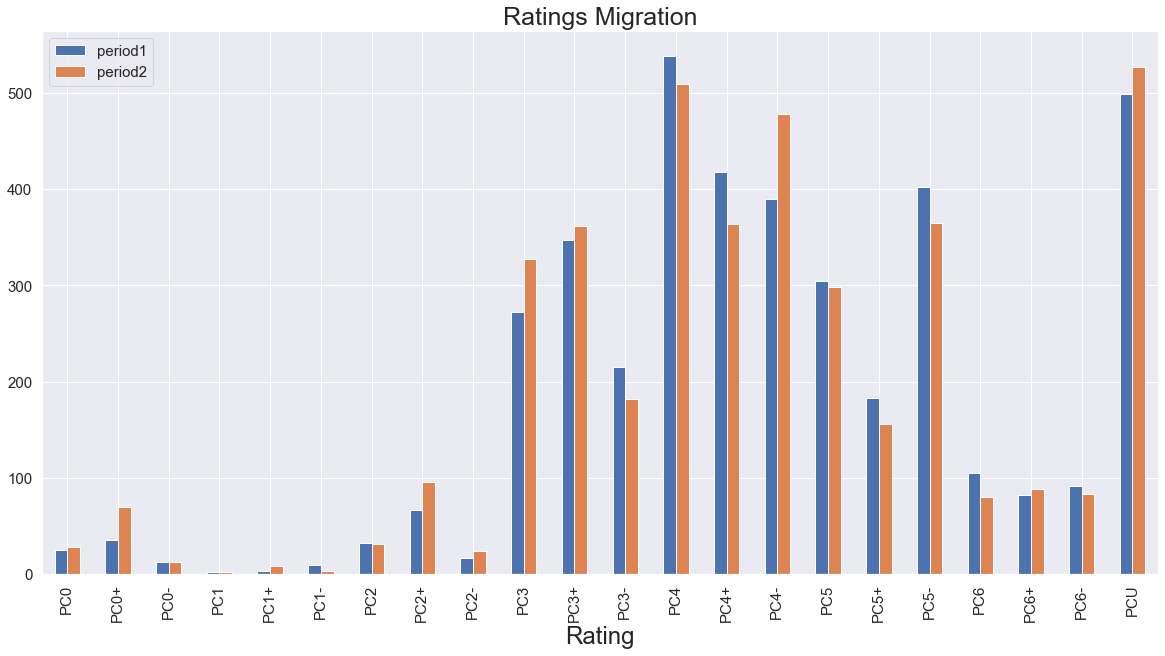

In [209]:
ratings_outer_merged.plot(kind='bar',figsize=(20,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.title('Ratings Migration', fontsize=25)
plt.show()

Excluding a couple of exceptions, it looks like there has been an increase in low rating and a decrease in high ratings. Since the Probability of Default is inversely proportional to the rating, this would suggest that from period 1 to period 2 there has been an increase in PD.
Let's have a look at some other metrics!


### 5. Increased risk weight

In [210]:
# creation of a new column for IRW

merged_outer['IRW_1']= merged_outer['RWA_x'] / merged_outer['EAD Amount_x']
merged_outer['IRW_2']= merged_outer['RWA_y'] / merged_outer['EAD Amount_y']

In [211]:
# creation of a new dataset for IRW

IRW_outer = merged_outer[['ID','IRW_1','IRW_2']]
IRW_outer = pd.melt(IRW_outer, id_vars="ID", var_name="Period", value_name="Values")

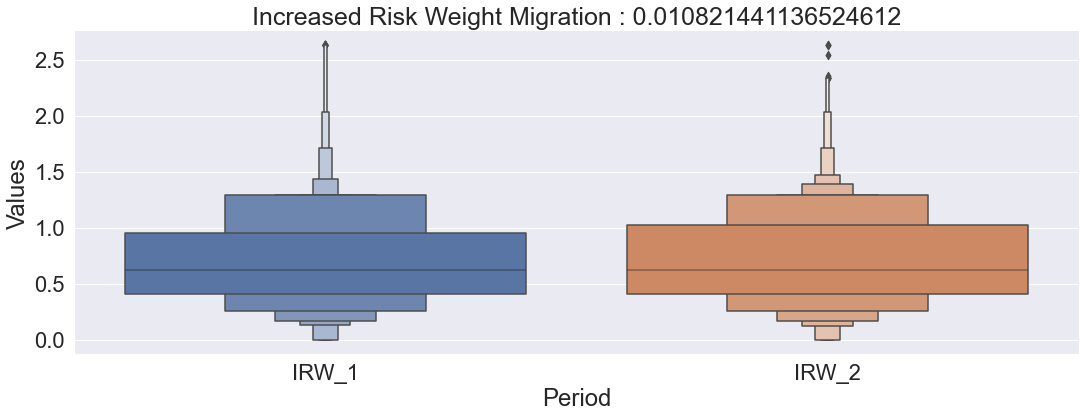

In [178]:
# calculation of the mean difference in IRW and comparison of the distribution 

IRW_diff = merged_outer.IRW_2.mean()- merged_outer.IRW_1.mean()

g = sns.catplot(x="Period", y="Values",
                data=IRW_outer, kind="boxen",
                height=6, aspect=2.6);
plt.title(f'Increased Risk Weight Migration : {IRW_diff}', fontsize=25)

sns.set(font_scale=2)
plt.show()





### 6. Expected Loss

Text(0.5, 1.0, 'Expected Loss Migration: 20.56797294995185')

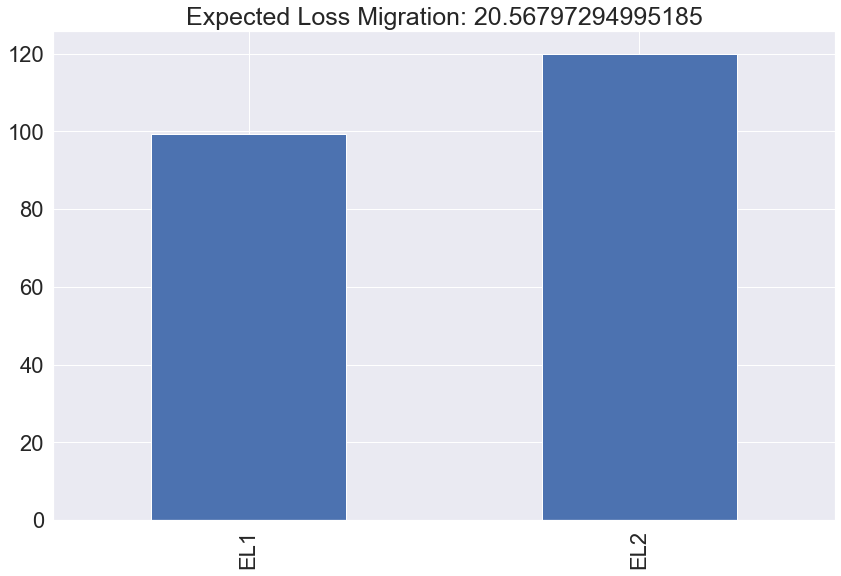

In [179]:
# creation of a new dataset for EL

EL_outer = merged_outer[['ID','Expected Loss_x','Expected Loss_y']]
EL_outer = EL_outer.rename(columns={'Expected Loss_x':'EL1','Expected Loss_y':'EL2'})

# calculation and visualization of the mean difference in EL

EL_diff = EL_outer.EL2.mean()- EL_outer.EL1.mean()
EL_cols = ['EL1', 'EL2']
EL_outer[EL_cols].mean().plot(kind='bar',figsize=(14,9))

plt.title(f'Expected Loss Migration: {EL_diff}', fontsize=25)


To sum up, the data shows that between period1 and period2:
- there has been a 0,010 in Increased Risk Weight
- there has been a 20.56797294995185 increase in Expected Loss

### 7. Impact of new customers

So far, I have comparing data taking into account all the customers: the ones that appear in both periods and the ones appearing only in one of them. How to measure the impact of new customers? I will do this by comparing metrics between the 'merged_inner' set (containing common customers between the two periods) and the 'merged_right' one (containing common customers plus the new customers that appear in period 2).

7.1 Increased Risk Weight

In [180]:
merged_inner['IRW_1']= merged_inner['RWA_x'] / merged_inner['EAD Amount_x']
merged_inner['IRW_2']= merged_inner['RWA_y'] / merged_inner['EAD Amount_y']
IRW_inner = merged_inner[['ID','IRW_1','IRW_2']]
IRW_inner = pd.melt(IRW_inner, id_vars="ID", var_name="Period", value_name="Values")

In [181]:
merged_right['IRW_1']= merged_right['RWA_x'] / merged_right['EAD Amount_x']
merged_right['IRW_2']= merged_right['RWA_y'] / merged_right['EAD Amount_y']
IRW_right = merged_right[['ID','IRW_1','IRW_2']]
IRW_right = pd.melt(IRW_right, id_vars="ID", var_name="Period", value_name="Values")

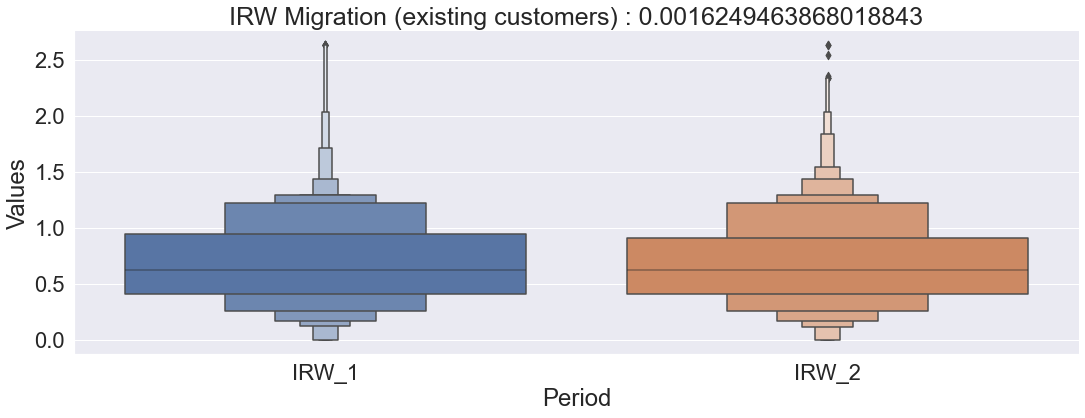

In [182]:
IRW_inner_diff = merged_inner.IRW_2.mean()- merged_inner.IRW_1.mean()

g = sns.catplot(x="Period", y="Values",
                data=IRW_inner, kind="boxen",
                height=6, aspect=2.6);
plt.title(f'IRW Migration (existing customers) : {IRW_inner_diff}', fontsize=25)

sns.set(font_scale=2)
plt.show()

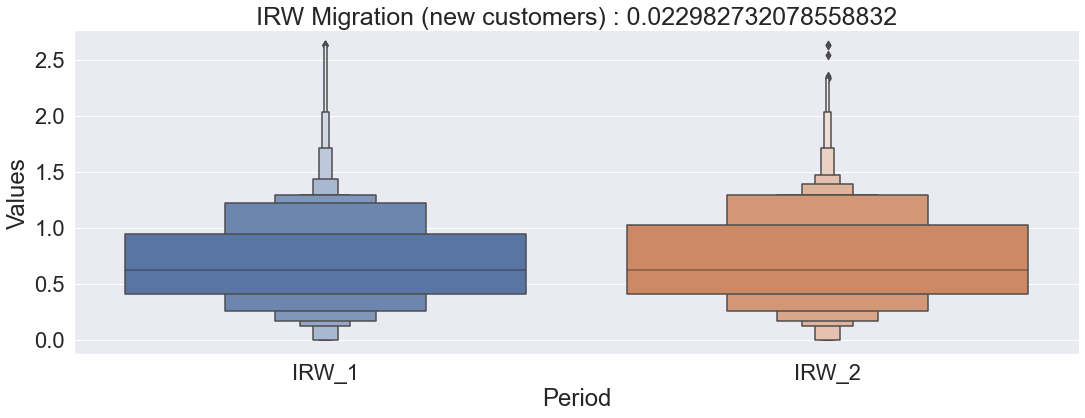

In [183]:
IRW_right_diff = merged_right.IRW_2.mean()- merged_right.IRW_1.mean()

g = sns.catplot(x="Period", y="Values",
                data=IRW_right, kind="boxen",
                height=6, aspect=2.6);
plt.title(f'IRW Migration (new customers) : {IRW_right_diff}', fontsize=25)

sns.set(font_scale=2)
plt.show()

7.2 Expected Loss

Text(0.5, 1.0, 'EL Migration (existing customers): 24.20009026730483')

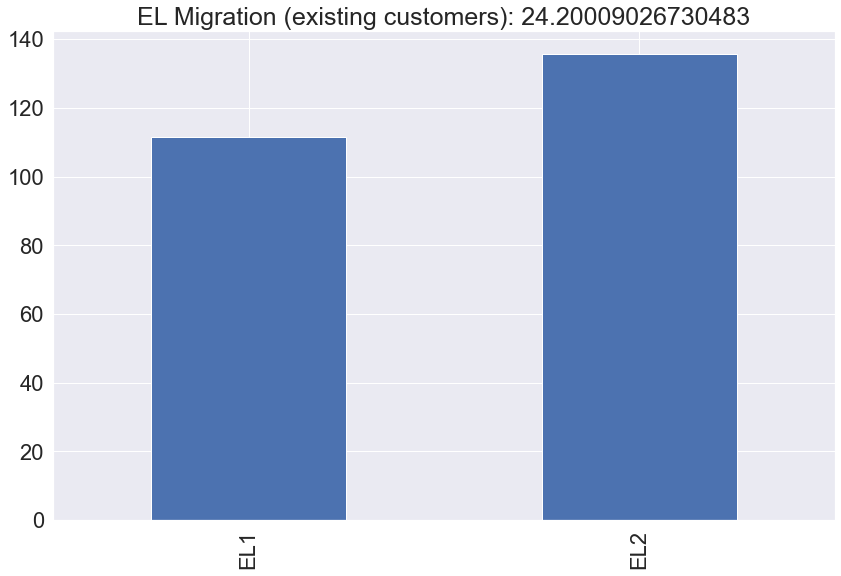

In [184]:
EL_inner = merged_inner[['ID','Expected Loss_x','Expected Loss_y']]
EL_inner = EL_inner.rename(columns={'Expected Loss_x':'EL1','Expected Loss_y':'EL2'})

EL_inner_diff = EL_inner.EL2.mean()- EL_inner.EL1.mean()
EL_inner_cols = ['EL1', 'EL2']
EL_inner[EL_inner_cols].mean().plot(kind='bar',figsize=(14,9))

plt.title(f'EL Migration (existing customers): {EL_inner_diff}', fontsize=25)



Text(0.5, 1.0, 'EL Migration (new customers): 8.486581273444486')

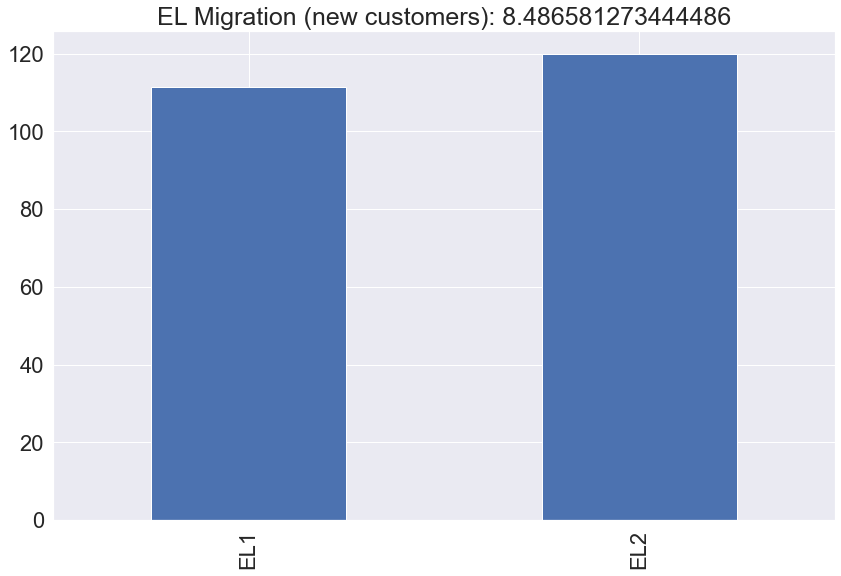

In [185]:
EL_right = merged_right[['ID','Expected Loss_x','Expected Loss_y']]
EL_right = EL_right.rename(columns={'Expected Loss_x':'EL1','Expected Loss_y':'EL2'})

EL_right_diff = EL_right.EL2.mean()- EL_right.EL1.mean()
EL_right_cols = ['EL1', 'EL2']
EL_right[EL_right_cols].mean().plot(kind='bar',figsize=(14,9))

plt.title(f'EL Migration (new customers): {EL_right_diff}', fontsize=25)


7.3 Probability of Default

Ok, so it seems like new customers have a higher impact on the increased risk weight but a lower impact on the Expected Loss. 
Does this mean that the new customers have a lower impact on probability of default than the existing ones? Let's see!

In [186]:
PD_inner = merged_inner[['ID','PD_x','PD_y']]
PD_inner = PD_inner.rename(columns= {'PD_x':'PD1','PD_y':'PD2'})
PD_inner = pd.melt(PD_inner, id_vars="ID", var_name="Period", value_name="Values")

In [187]:
PD_right = merged_right[['ID','PD_x','PD_y']]
PD_right = PD_right.rename(columns= {'PD_x':'PD1','PD_y':'PD2'})
PD_right = pd.melt(PD_right, id_vars="ID", var_name="Period", value_name="Values")

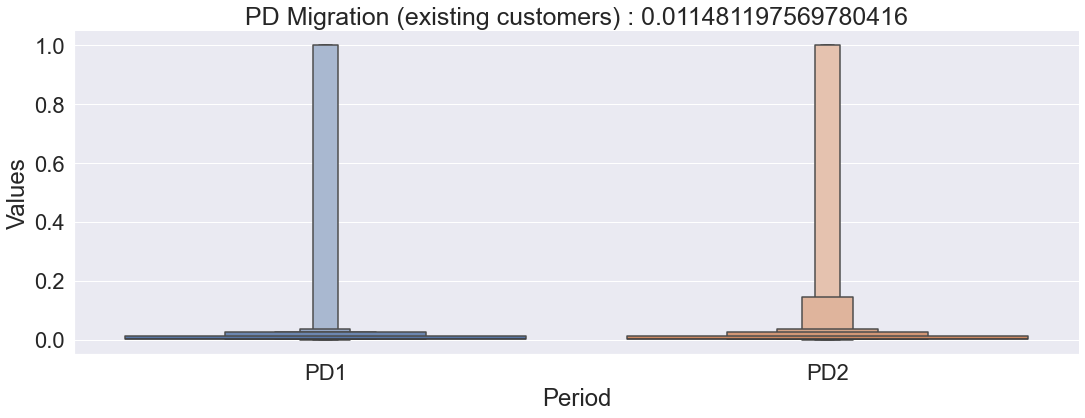

In [188]:
PD_inner_diff = merged_inner.PD_y.mean()- merged_inner.PD_x.mean()

g = sns.catplot(x="Period", y="Values",
                data=PD_inner, kind="boxen",
                height=6, aspect=2.6);
plt.title(f'PD Migration (existing customers) : {PD_inner_diff}', fontsize=25)

sns.set(font_scale=2)
plt.show()

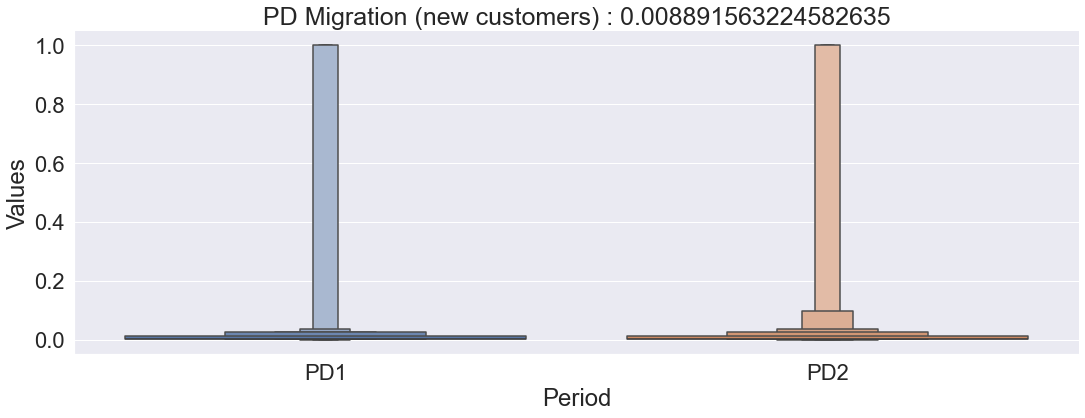

In [189]:
PD_right_diff = merged_right.PD_y.mean()- merged_right.PD_x.mean()

g = sns.catplot(x="Period", y="Values",
                data=PD_right, kind="boxen",
                height=6, aspect=2.6);
plt.title(f'PD Migration (new customers) : {PD_right_diff}', fontsize=25)

sns.set(font_scale=2)
plt.show()

The results do confirm that existing customers had a bigger impact on the rise of PD than new customers.

### 8. Impact of defaulted and unrated customers

What about the impact of unrated and defaulted customers? 
In the next lines, I will create a new dataframe that doesn't contain the rows of unrated and defaulted customers; I will then compare metrics between this dataframe and the dataframe with all the customers.

In [190]:
period1_drop = period1[(period1.PD != 0) & (period1.PD != 1)]
period2_drop = period2[(period2.PD != 0) & (period2.PD != 1)]
merged_drop = period1_drop.merge(period2_drop, on='ID', how='outer')

8.1 Increased Risk Weight

In [192]:
merged_drop['IRW_1']= merged_drop['RWA_x'] / merged_drop['EAD Amount_x']
merged_drop['IRW_2']= merged_drop['RWA_y'] / merged_drop['EAD Amount_y']
IRW_drop = merged_drop[['ID','IRW_1','IRW_2']]
IRW_drop = pd.melt(IRW_drop, id_vars="ID", var_name="Period", value_name="Values")

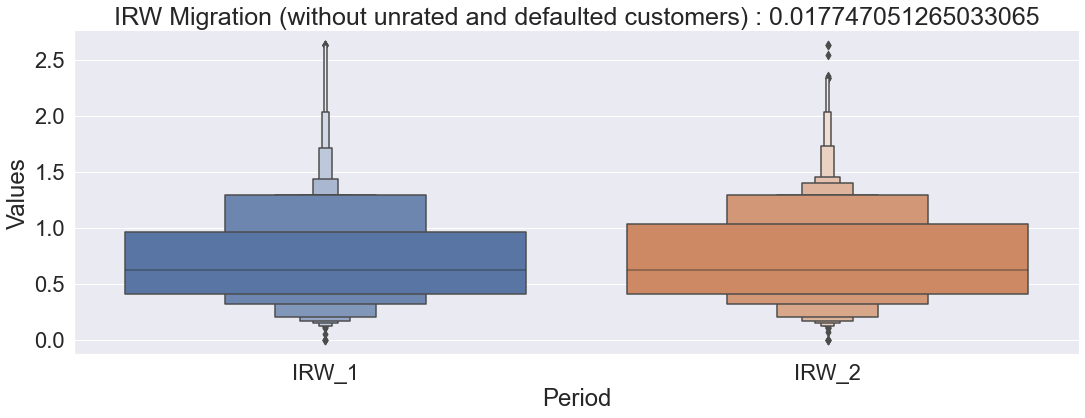

In [193]:
IRW_drop_diff = merged_drop.IRW_2.mean()- merged_drop.IRW_1.mean()

g = sns.catplot(x="Period", y="Values",
                data=IRW_drop, kind="boxen",
                height=6, aspect=2.6);
plt.title(f'IRW Migration (without unrated and defaulted customers) : {IRW_drop_diff}', fontsize=25)

sns.set(font_scale=2)
plt.show()

8.2 Expected Loss

Text(0.5, 1.0, 'EL Migration(without unrated and defaulted customers): -19.12409410738092')

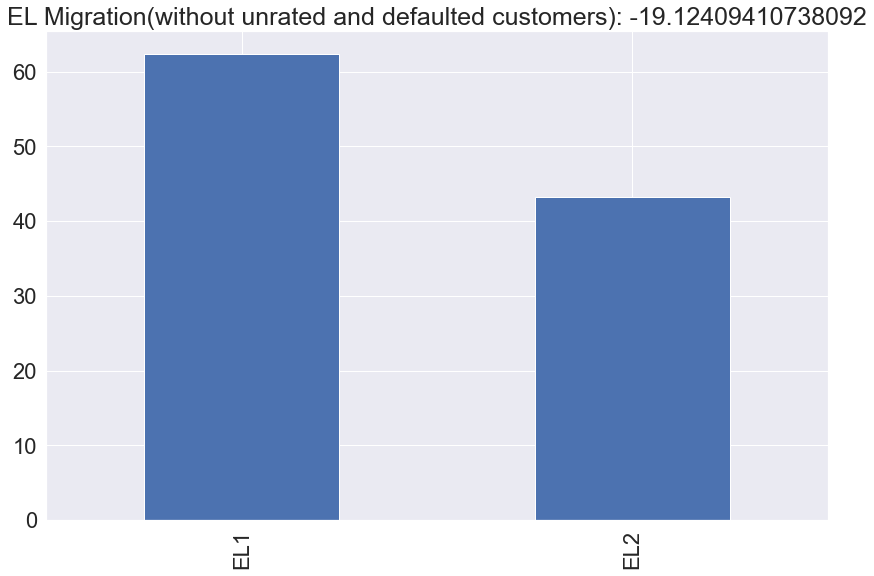

In [194]:
EL_drop = merged_drop[['ID','Expected Loss_x','Expected Loss_y']]
EL_drop = EL_drop.rename(columns={'Expected Loss_x':'EL1','Expected Loss_y':'EL2'})

EL_drop_diff = EL_drop.EL2.mean()- EL_drop.EL1.mean()
EL_drop_cols = ['EL1', 'EL2']
EL_drop[EL_drop_cols].mean().plot(kind='bar',figsize=(14,9))

plt.title(f'EL Migration(without unrated and defaulted customers): {EL_drop_diff}', fontsize=25)



8.3 Probability of Default

In [195]:
PD_drop = merged_drop[['ID','PD_x','PD_y']]
PD_drop = PD_drop.rename(columns= {'PD_x':'PD1','PD_y':'PD2'})
PD_drop = pd.melt(PD_drop, id_vars="ID", var_name="Period", value_name="Values")

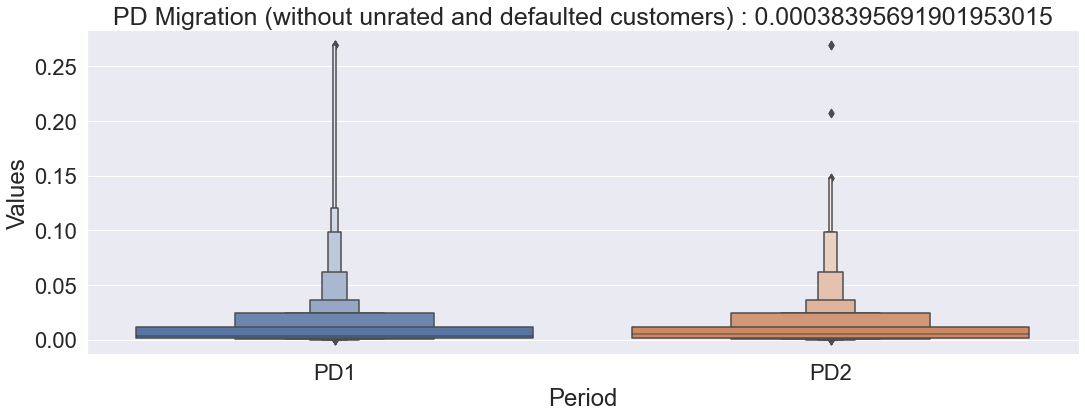

In [196]:
PD_drop_diff = merged_drop.PD_y.mean()- merged_drop.PD_x.mean()

g = sns.catplot(x="Period", y="Values",
                data=PD_drop, kind="boxen",
                height=6, aspect=2.6);
plt.title(f'PD Migration (without unrated and defaulted customers) : {PD_drop_diff}', fontsize=25)

sns.set(font_scale=2)
plt.show()

The data shows that unrated and defaulted have quite a big impact on the increase of Expected Loss and Probability of Default:
- without them EL migration would go from 20.56797294995185 to -19.12409410738092
- without them PD migration would go from 0.011 to 0.0003

### 9. Which customers have increased/decreased capital consumption the most?

In order to answer this question, I will create a new column that will register the difference in capital requirements between period1 and period2. 
I will do my analysis considering the existing customers but excluding unrated and defaulted customers; for this I will first create a new dataframe 'merged_drop_inner'.

In [197]:
merged_drop_inner = period1_drop.merge(period2_drop, on='ID', how='inner')
merged_drop_inner['Capital Requirement_diff'] = merged_drop_inner['Capital Requirement_y'] - merged_drop_inner['Capital Requirement_x']

In [198]:
# creation of a new dataframe for capital requirement and sorting values by capital requirement difference

capital_df = merged_drop_inner[['ID','Capital Requirement_x','Capital Requirement_y','Capital Requirement_diff']]
capital_df = capital_df.sort_values(by=['Capital Requirement_diff'])
capital_df

,ID,Capital Requirement_x,Capital Requirement_y,Capital Requirement_diff
2707,3396,839948.80305,91393.46090,-748555.34215
2708,3397,20919.01494,2400.85248,-18518.16246
1330,1706,27829.18251,9887.17751,-17942.00500
54,175,11853.98750,347.28761,-11506.69989
166,311,13794.12683,3300.40137,-10493.72546
...,...,...,...,...
22,135,37557.74841,45898.21387,8340.46546
958,1279,5884.93587,16342.82232,10457.88645
1298,1662,6.89405,12599.25967,12592.36562
17,130,13440.04953,32099.77193,18659.72240


According to this dataframe, the five first customers have the lowest difference in capital requirements between the two periods, the last five have the highest difference.